In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv(r"C:\Users\HP\OneDrive\Desktop\ML\creditcard.csv")
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [4]:
data.isnull().values.any()

False

In [5]:
Labels=['ok','fraud']

In [6]:
sort_data=pd.value_counts(data['Class'],sort=True)
sort_data.head()

0    284315
1       492
Name: Class, dtype: int64

Text(0, 0.5, 'Count')

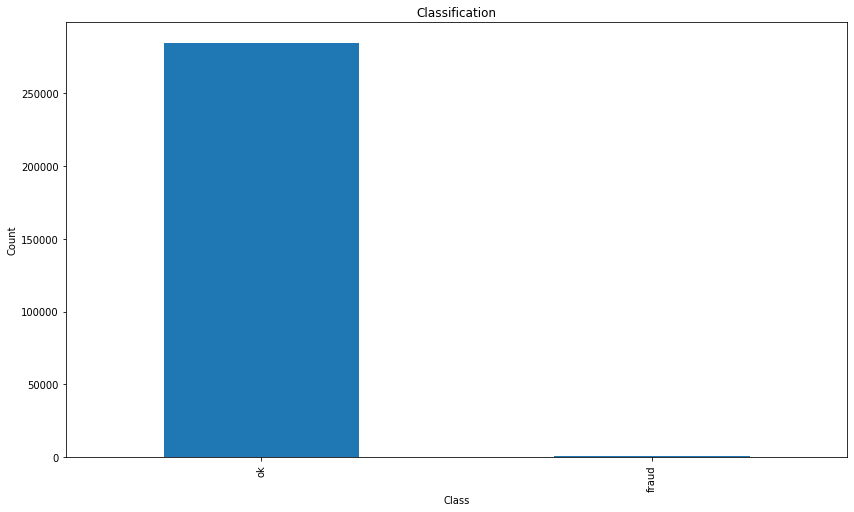

In [7]:
from pylab import rcParams
rcParams['figure.figsize']=14,8
sort_data.plot(kind='bar')
plt.xticks(range(2),Labels)
plt.title("Classification")
plt.xlabel("Class")
plt.ylabel("Count")

In [8]:
ok=data[data['Class']==0]
fraud=data[data['Class']==1]


In [9]:

print(ok.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


In [10]:
ok.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [11]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

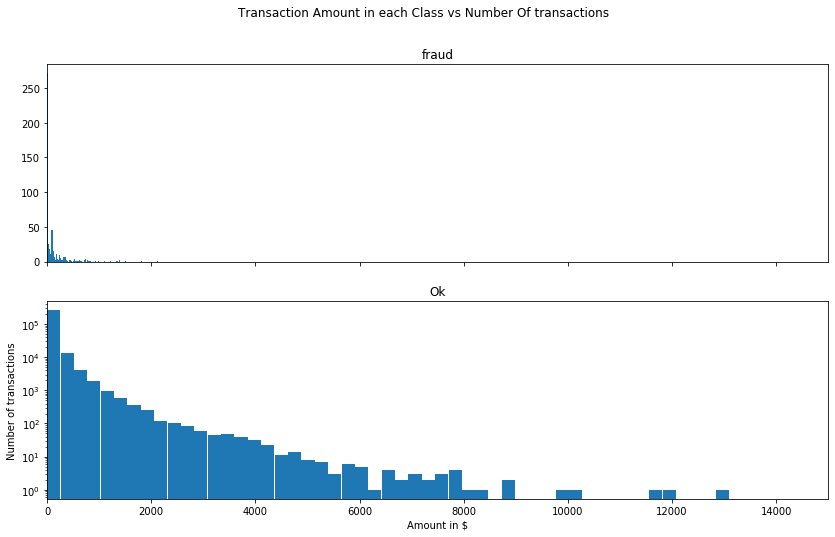

In [12]:
a,(y1,y2)=plt.subplots(nrows=2,ncols=1,sharex=True)
y1.hist(fraud.Amount,rwidth=0.98,bins=100)
y2.hist(ok.Amount,rwidth=0.98,bins=100)
a.suptitle("Transaction Amount in each Class vs Number Of transactions ")
y1.set_title("fraud")
y2.set_title("Ok")
plt.xlabel("Amount in $")
plt.ylabel("Number of transactions")
plt.xlim((0,15000))
plt.yscale('log')
plt.show()

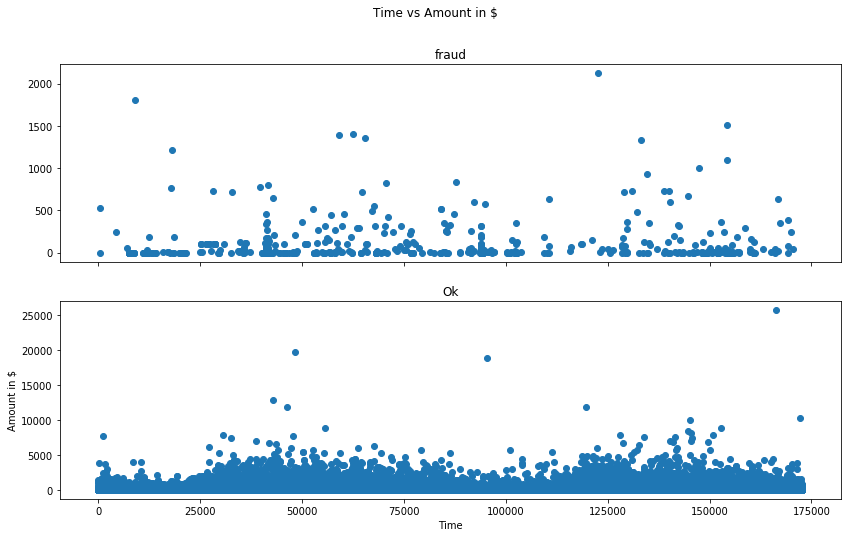

In [13]:
b,(y1,y2)=plt.subplots(nrows=2,ncols=1,sharex=True)
y1.scatter(y=fraud.Amount,x=fraud.Time)
y2.scatter(y=ok.Amount,x=ok.Time)
b.suptitle("Time vs Amount in $ ")
y1.set_title("fraud")
y2.set_title("Ok")
plt.xlabel("Time")
plt.ylabel("Amount in $")
plt.show()

In [14]:
data1=data.sample(frac=0.1,random_state=1)
data1.shape

(28481, 31)

In [17]:
data.shape

(284807, 31)

In [18]:
fraud1=data1[data1['Class']==1]
ok1=data1[data1['Class']==0]

In [19]:
data1.corr().style.background_gradient(cmap="Reds")

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1,0.126475,-0.00158373,-0.413547,-0.104527,0.182205,-0.0604828,0.0789245,-0.0404741,-0.00842807,0.0359387,-0.237613,0.126985,-0.0693529,-0.0932638,-0.182255,0.0073917,-0.0745545,0.0839585,0.0194687,-0.0509674,0.0413228,0.150603,0.0479415,-0.020018,-0.229491,-0.0481312,-0.00554125,-0.00433888,-0.0269691,-0.00508689
V1,0.126475,1,0.048796,0.0154515,-0.0105915,0.0198876,0.00641705,-0.0205826,-0.00301347,0.00165818,0.0106855,0.00717693,-0.0122903,-0.0188488,-0.00190462,-0.0128835,-0.0155692,-0.00964431,-0.0118216,0.00386019,-0.0178833,-0.0164145,0.014896,0.0494473,-0.00370875,0.0140553,0.00720336,-0.0115447,0.0850348,-0.262703,-0.0798202
V2,-0.00158373,0.048796,1,0.0272704,-0.0225385,0.00966567,-0.00441122,-0.0134561,0.015662,0.00345566,0.0172179,-0.00298165,0.000645779,0.00165484,-0.00661666,0.00204575,-0.00306247,0.00356685,-0.00592166,0.0119496,-0.0544673,-0.0201273,0.0219226,0.0475911,-0.0113865,0.0118379,0.00536579,-0.00961095,0.0848735,-0.556401,0.0695981
V3,-0.413547,0.0154515,0.0272704,1,-0.00542264,0.0139972,-0.00690339,-0.02464,-0.0255293,0.0025252,-0.00695477,0.000835865,-0.00823558,0.00403028,-0.0167021,0.00442126,-0.0127803,-0.0177219,0.00105592,0.0202821,0.00306761,-0.00608257,0.0141765,0.0426034,-0.00188304,0.0059748,0.00686934,-0.0170938,0.0299734,-0.225099,-0.160051
V4,-0.104527,-0.0105915,-0.0225385,-0.00542264,1,-0.00370774,0.00202896,0.00443245,0.0116591,-0.00439488,-0.000669285,0.00765668,0.0059421,-0.0116365,0.00348537,-0.000574729,-0.00478328,0.0125535,0.00185234,0.0017591,0.0153479,-0.00442253,-0.011251,-0.0176816,0.00182883,-0.00969236,0.00408687,0.024489,-0.024554,0.111692,0.122631
V5,0.182205,0.0198876,0.00966567,0.0139972,-0.00370774,1,-0.0166562,-0.0374632,-0.0132632,-0.00850582,0.0114459,0.00628553,-0.011393,-0.00272796,0.00154776,-0.00673096,-0.0148227,-0.0130903,0.000902147,0.00146797,0.00534992,0.00228849,0.0220649,0.0647034,-0.00718372,0.00649349,4.80015e-05,-0.0279338,0.010991,-0.397437,-0.0735185
V6,-0.0604828,0.00641705,-0.00441122,-0.00690339,0.00202896,-0.0166562,1,0.00692254,0.00369505,-0.00276174,-0.00311965,0.00158209,-0.000218753,-0.00159078,-0.00782798,0.00640711,0.0092373,0.00920052,-0.00271914,-0.00520531,-0.00899121,0.00449048,-0.00370453,-0.0367256,0.00142779,-0.0150115,0.00993783,-0.00481112,-0.00977151,0.213007,-0.0350846
V7,0.0789245,-0.0205826,-0.0134561,-0.02464,0.00443245,-0.0374632,0.00692254,1,-0.0282906,-0.00551017,-0.0351488,0.000862723,-0.00873982,0.0024454,-0.00129994,-0.00396887,-0.0109285,-0.0175246,-0.0152211,0.00262092,0.0230114,0.00701229,-0.0138711,-0.0552416,0.00289866,-0.0169414,-7.52801e-05,-0.0129734,-0.0375928,0.417814,-0.134247
V8,-0.0404741,-0.00301347,0.015662,-0.0255293,0.0116591,-0.0132632,0.00369505,-0.0282906,1,-0.0186449,-0.0179953,-0.00256209,-0.00938749,0.0120107,-0.00187589,-0.000946451,-4.80342e-05,-0.0203433,-0.0131911,0.00345262,0.0139107,-0.00565113,-0.00419495,0.0300922,-0.00882147,0.0172983,0.0153846,0.00849472,0.0155251,-0.102221,0.0248956
V9,-0.00842807,0.00165818,0.00345566,0.0025252,-0.00439488,-0.00850582,-0.00276174,-0.00551017,-0.0186449,1,-0.0217185,0.000586586,0.00279382,0.00173297,0.00431021,-0.0144363,0.00028584,-0.00703329,-0.00103568,-0.00386519,-0.0125466,0.00946211,-0.00229724,0.00236031,0.00744137,-0.00914884,-0.00365198,-0.0117014,-0.0262899,-0.0397732,-0.0799624


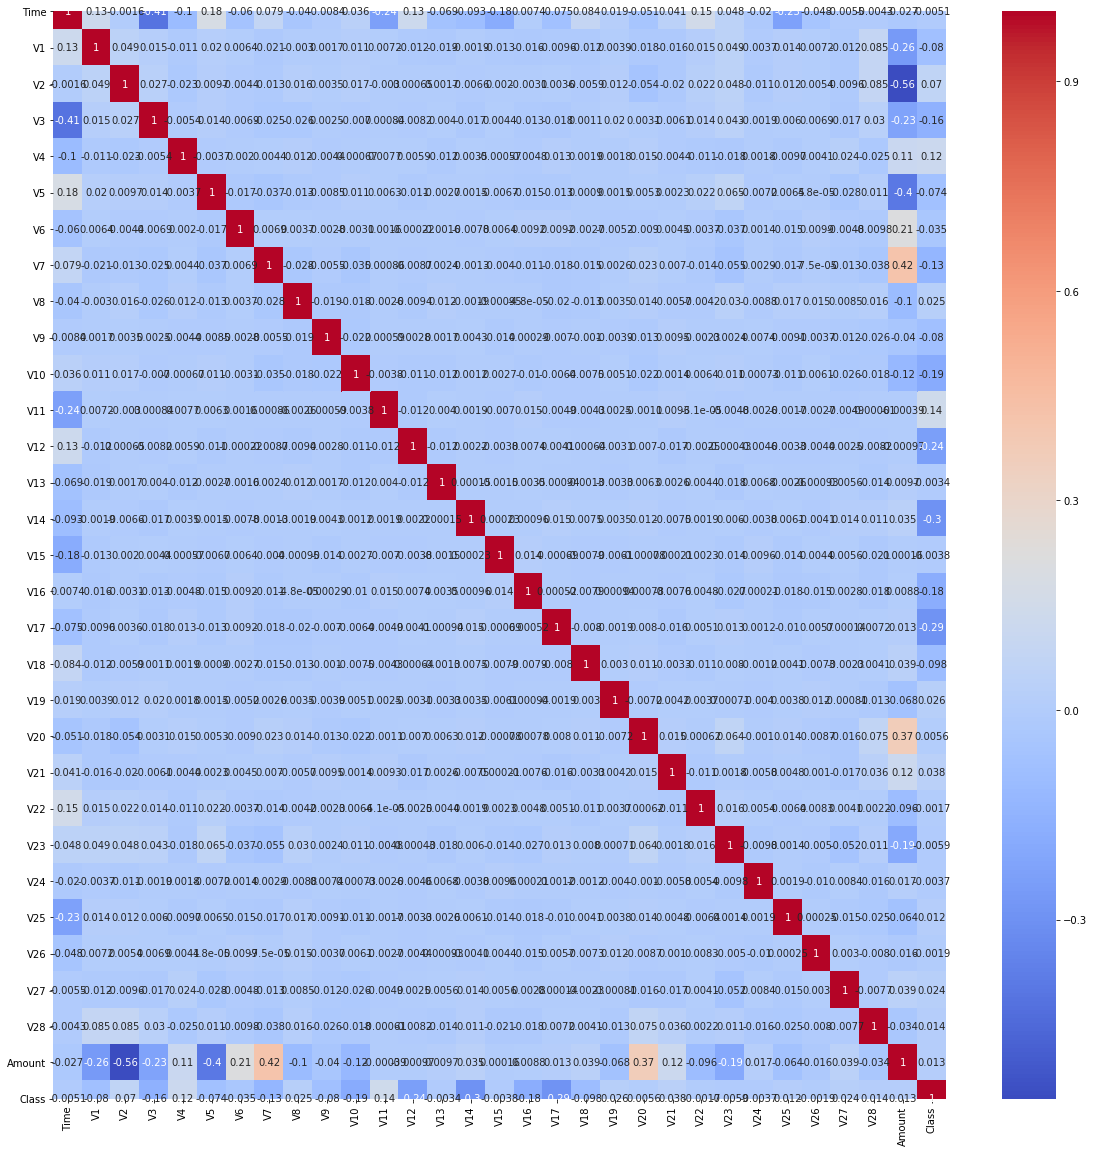

In [20]:
import seaborn
plt.figure(figsize=(20,20))
seaborn.heatmap(data1.corr(),annot=True,cmap="coolwarm")

In [21]:
data1.columns.tolist()

['Time',
 'V1',
 'V2',
 'V3',
 'V4',
 'V5',
 'V6',
 'V7',
 'V8',
 'V9',
 'V10',
 'V11',
 'V12',
 'V13',
 'V14',
 'V15',
 'V16',
 'V17',
 'V18',
 'V19',
 'V20',
 'V21',
 'V22',
 'V23',
 'V24',
 'V25',
 'V26',
 'V27',
 'V28',
 'Amount',
 'Class']

In [22]:
Columns=data1.columns
Columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [23]:
Columns=[c for c in Columns if c not in ['Class']]
Columns

['Time',
 'V1',
 'V2',
 'V3',
 'V4',
 'V5',
 'V6',
 'V7',
 'V8',
 'V9',
 'V10',
 'V11',
 'V12',
 'V13',
 'V14',
 'V15',
 'V16',
 'V17',
 'V18',
 'V19',
 'V20',
 'V21',
 'V22',
 'V23',
 'V24',
 'V25',
 'V26',
 'V27',
 'V28',
 'Amount']

In [24]:
to_predict = "Class"
X=data1[Columns]
Y=data1[to_predict]

In [25]:
X.shape,Y.shape

((28481, 30), (28481,))

In [27]:
#here i'm training data in different three models and see how to act
#Isolation Forest
#Local outlier detection
#Support Vector machine(SVM's)
import sklearn
import scipy
from sklearn.metrics import classification_report,accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM

In [30]:
import numpy as np
c=len(fraud1)/len(ok1)
ran_state=np.random.RandomState(50)
my_classifiers = {
    "Isolation Forest" : IsolationForest(n_estimators=100,max_samples=len(X),contamination=c,random_state=ran_state),
    "Local Outlier" : LocalOutlierFactor(n_neighbors=20,algorithm='auto',leaf_size=30, metric='minkowski',p=2, 
                                                    metric_params=None, contamination=c),
    "Support Vector Machine" : OneClassSVM(kernel='rbf',degree=3,gamma=0.1,random_state=ran_state) 
}

In [34]:
for i,(clf_name,clf) in  enumerate(my_classifiers.items()):
    if clf_name == 'Local Outlier':
        y = clf.fit_predict(X)
    # for isolation forest and local outlier
    #we can also calculate scores if we want, scores here determine how a data point is isolated
    else:
        clf.fit(X)
        y=clf.predict(X)
    y[y == 1] = 0
    y[y == -1] = 1
    errors = (y != Y).sum()
    print("{}: {}".format(clf_name,errors))
    print("Accuracy Score :")
    print(accuracy_score(Y,y))
    print("Classification Report :")
    print(classification_report(Y,y))

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:247: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:415: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


Isolation Forest: 73
Accuracy Score :
0.9974368877497279
Classification Report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28432
           1       0.26      0.27      0.26        49

    accuracy                           1.00     28481
   macro avg       0.63      0.63      0.63     28481
weighted avg       1.00      1.00      1.00     28481

Local Outlier: 97
Accuracy Score :
0.9965942207085425
Classification Report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28432
           1       0.02      0.02      0.02        49

    accuracy                           1.00     28481
   macro avg       0.51      0.51      0.51     28481
weighted avg       1.00      1.00      1.00     28481



C:\Users\HP\Anaconda3\lib\site-packages\sklearn\svm\classes.py:1194: DeprecationWarning: The random_state parameter is deprecated and will be removed in version 0.22.
  " be removed in version 0.22.", DeprecationWarning)


Support Vector Machine: 16277
Accuracy Score :
0.42849619044275133
Classification Report :
              precision    recall  f1-score   support

           0       1.00      0.43      0.60     28432
           1       0.00      0.51      0.00        49

    accuracy                           0.43     28481
   macro avg       0.50      0.47      0.30     28481
weighted avg       1.00      0.43      0.60     28481

